In [83]:
import numpy as np
import pandas as pd



In [84]:
data_thyao_dortsaat = pd.read_excel('THYAO_240Dk.xlsx')
data_thyao_dortsaat

,Date,Time,Open,High,Low,Close,"MACD (26,12)",TRIGGER (9),"BOL U (20,2)","BOL M (20,2)","BOL D (20,2)",RSI (14)
0,03.11.2020,14:00,9.41,9.67,9.34,9.51,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
1,03.11.2020,18:00,9.52,9.52,9.52,9.52,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
2,04.11.2020,10:00,9.52,9.78,9.47,9.63,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
3,04.11.2020,14:00,9.63,9.92,9.62,9.79,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
4,04.11.2020,18:00,9.78,9.78,9.78,9.78,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2595,26.04.2024,14:00,317.00,319.00,315.25,316.50,4.358951,3.083766,318.773355,304.8625,290.951645,69.720226
2596,26.04.2024,18:00,316.50,317.00,316.50,317.00,4.578920,3.382797,320.404308,305.6750,290.945692,70.258528
2597,29.04.2024,10:00,319.75,326.00,319.50,325.50,5.377141,3.781666,323.479984,307.1750,290.870016,77.561507
2598,29.04.2024,14:00,325.50,325.75,323.50,325.75,5.961193,4.217571,325.937024,308.7000,291.462976,77.734677


In [85]:
data_thyao_dortsaat.describe()

,Open,High,Low,Close,"MACD (26,12)",TRIGGER (9),"BOL U (20,2)","BOL M (20,2)","BOL D (20,2)",RSI (14)
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,102.803908,103.662319,101.999038,102.810277,0.794521,0.786872,106.700049,101.617612,96.535174,56.540129
std,96.382831,97.109521,95.717331,96.367907,2.324463,2.198961,99.960911,95.670375,91.488921,16.247798
min,9.410000,9.520000,9.340000,9.510000,-6.573430,-5.692022,0.000000,0.000000,0.000000,0.000000
25%,14.405000,14.507500,14.310000,14.410000,-0.092408,-0.088976,14.781443,14.255000,13.724887,45.595645
50%,52.800000,53.975000,52.575000,53.300000,0.252419,0.246893,53.762632,50.646000,48.502187,57.201870
75%,178.150000,180.550000,177.025000,178.225000,1.448285,1.456436,187.550572,177.452500,160.746853,68.095074
max,325.500000,326.000000,325.500000,326.000000,9.974408,9.165981,328.161977,310.100000,292.038023,93.215663


In [86]:
data_thyao_dortsaat.isnull().sum().sort_values(ascending=False)

Date               0
Time               0
Open               0
High               0
Low                0
Close              0
MACD (26,12)       0
TRIGGER (9)        0
BOL U (20,2)       0
BOL M (20,2)       0
BOL D (20,2)       0
RSI (14)           0
dtype: int64

In [87]:
#model deneyelim 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import os

from sklearn.preprocessing import MinMaxScaler



In [88]:
df = data_thyao_dortsaat[['Date', 'Open', 'High', 'Low', 'Close', 'MACD (26,12)   ', 'TRIGGER (9)   ', 'BOL U (20,2)   ', 'BOL M (20,2)   ', 'BOL D (20,2)   ', 'RSI (14)   ']]
df_timestamp = data_thyao_dortsaat[["Date"]]
df_ = df[['Open', 'High', 'Low', 'Close', 'MACD (26,12)   ', 'TRIGGER (9)   ', 'BOL U (20,2)   ', 'BOL M (20,2)   ', 'BOL D (20,2)   ', 'RSI (14)   ']]
#df_ = df[['Close', 'MACD (26,12)   ', 'TRIGGER (9)   ', 'BOL U (20,2)   ', 'BOL M (20,2)   ', 'BOL D (20,2)   ', 'RSI (14)   ']]

df_

,Open,High,Low,Close,"MACD (26,12)",TRIGGER (9),"BOL U (20,2)","BOL M (20,2)","BOL D (20,2)",RSI (14)
0,9.41,9.67,9.34,9.51,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
1,9.52,9.52,9.52,9.52,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
2,9.52,9.78,9.47,9.63,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
3,9.63,9.92,9.62,9.79,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
4,9.78,9.78,9.78,9.78,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2595,317.00,319.00,315.25,316.50,4.358951,3.083766,318.773355,304.8625,290.951645,69.720226
2596,316.50,317.00,316.50,317.00,4.578920,3.382797,320.404308,305.6750,290.945692,70.258528
2597,319.75,326.00,319.50,325.50,5.377141,3.781666,323.479984,307.1750,290.870016,77.561507
2598,325.50,325.75,323.50,325.75,5.961193,4.217571,325.937024,308.7000,291.462976,77.734677


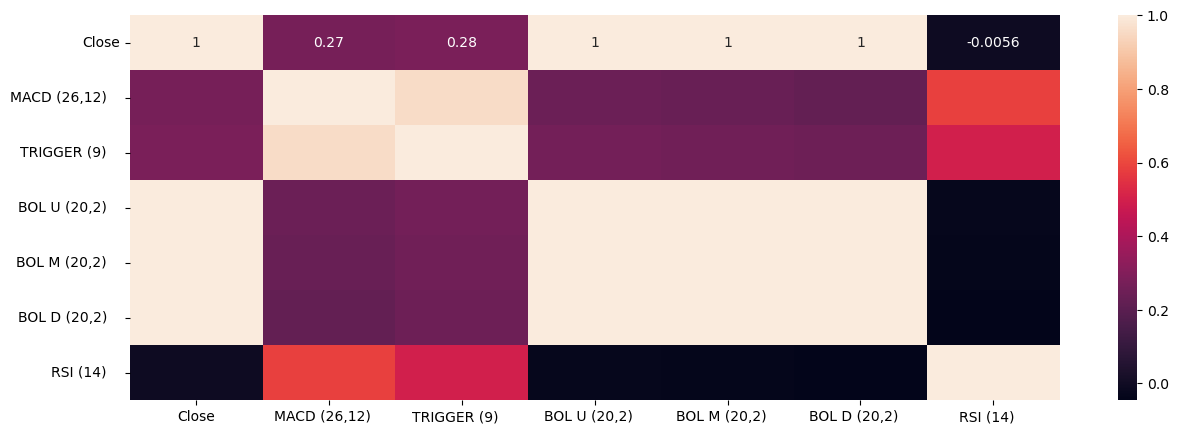

In [89]:
#cols_corr = ['Open', 'High', 'Low', 'Close', 'MACD (26,12)   ', 'TRIGGER (9)   ', 'BOL U (20,2)   ', 'BOL M (20,2)   ', 'BOL D (20,2)   ', 'RSI (14)   ' ,'HOURS', 'MINUTES', 'MINUTES_PASS']
cols_corr = ['Close', 'MACD (26,12)   ', 'TRIGGER (9)   ', 'BOL U (20,2)   ', 'BOL M (20,2)   ', 'BOL D (20,2)   ', 'RSI (14)   ']
corrMatrix = df_[cols_corr].corr()
plt.figure(figsize=(15,5))
fig_corr = sns.heatmap(corrMatrix, annot=True)
plt.show()

In [90]:
df_[['MACD (26,12)   ', 'TRIGGER (9)   ']]

,"MACD (26,12)",TRIGGER (9)
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
2595,4.358951,3.083766
2596,4.578920,3.382797
2597,5.377141,3.781666
2598,5.961193,4.217571


In [91]:
df_[['TRIGGER (9)   ']]

,TRIGGER (9)
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
2595,3.083766
2596,3.382797
2597,3.781666
2598,4.217571


MACD ile Trigger arasındaki bağlantı
MACD ile Trigger arasındaki bağlantıyı koda yansıtılması lazım

Sonuçları is_bigger sütununa eklenecek
İki değerde 0 ın altında iken MACD'nin Triggerı geçtiği kesinti anındaki ilk an 1 döndürülmeli
İki değerin herhangi kesme durumu olmadığı durumlarda 0 döndürmeli
İki değerde 1 in üstündeyken MACD'nin Trigger'dan az olduğu kesinti anındaki ilk an -1 döndürülmeli


In [167]:


        
#istenilen algoritma

df_['is_bigger'] = 0

for i in range(1, len(df_)):
    if (df_['MACD (26,12)   '][i] > 0 and df_['TRIGGER (9)   '][i] > 0):
        if (df_['MACD (26,12)   '][i] < df_['TRIGGER (9)   '][i] and df_['MACD (26,12)   '][i-1] >= df_['TRIGGER (9)   '][i-1]):
            df_['is_bigger'][i] = -1
    elif (df_['MACD (26,12)   '][i] < 0 and df_['TRIGGER (9)   '][i] < 0):
        if (df_['MACD (26,12)   '][i] > df_['TRIGGER (9)   '][i] and df_['MACD (26,12)   '][i-1] <= df_['TRIGGER (9)   '][i-1]):
            df_['is_bigger'][i] = 1

df_['is_bigger']

        

















/var/folders/j3/qxs60wws3sl6m3zzj7_42n0w0000gn/T/ipykernel_43049/1748645129.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['is_bigger'][i] = -1
/var/folders/j3/qxs60wws3sl6m3zzj7_42n0w0000gn/T/ipykernel_43049/1748645129.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['is_bigger'][i] = -1
/var/folders/j3/qxs60wws3sl6m3zzj7_42n0w0000gn/T/ipykernel_43049/1748645129.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

0       0
1       0
2       0
3       0
4       0
       ..
2595    0
2596    0
2597    0
2598    0
2599    0
Name: is_bigger, Length: 2600, dtype: int64

In [168]:
df_[1000:1050]

,Open,High,Low,Close,"MACD (26,12)",TRIGGER (9),"BOL U (20,2)","BOL M (20,2)","BOL D (20,2)",RSI (14),is_bigger
1000,25.30,25.66,25.26,25.30,-0.644131,-0.707378,27.043071,25.804,24.564929,34.902772,0
1001,25.30,25.30,25.30,25.30,-0.636518,-0.693206,27.042409,25.805,24.567591,34.902772,0
1002,24.90,25.26,24.54,24.68,-0.672758,-0.689117,27.088613,25.775,24.461387,29.840672,0
1003,24.68,26.08,24.50,25.92,-0.594568,-0.670207,27.101868,25.807,24.512132,46.540453,0
1004,25.92,25.92,25.90,25.90,-0.528127,-0.641791,27.054880,25.784,24.513120,46.348826,0
1005,25.52,26.28,25.28,25.94,-0.466863,-0.606805,26.777591,25.715,24.652409,46.820439,0
1006,25.92,26.18,25.48,25.50,-0.448643,-0.575173,26.401853,25.625,24.848147,42.404749,0
1007,25.50,25.50,25.30,25.30,-0.445211,-0.549180,26.303472,25.576,24.848528,40.533469,0
1008,25.90,26.48,25.80,26.22,-0.364057,-0.512156,26.385856,25.606,24.826144,51.201280,0
1009,26.24,26.36,25.82,26.16,-0.301113,-0.469947,26.449458,25.633,24.816542,50.564200,0


In [172]:
df_[190:200]

,Open,High,Low,Close,"MACD (26,12)",TRIGGER (9),"BOL U (20,2)","BOL M (20,2)","BOL D (20,2)",RSI (14),is_bigger
190,12.05,12.05,12.01,12.01,-0.239710,-0.225840,13.025971,12.3775,11.729029,31.072066,0
191,12.08,12.32,12.06,12.18,-0.224643,-0.225601,12.941365,12.3400,11.738635,39.596388,1
192,12.18,12.20,12.08,12.08,-0.218254,-0.224131,12.854567,12.2995,11.744433,36.719659,0
193,12.06,12.06,12.06,12.06,-0.212358,-0.221777,12.762713,12.2600,11.757287,36.153924,0
194,12.13,12.22,12.11,12.16,-0.197340,-0.216889,12.694610,12.2330,11.771390,41.044852,0
195,12.16,12.17,12.06,12.16,-0.183326,-0.210177,12.615409,12.2060,11.796591,41.044852,0
196,12.16,12.16,12.15,12.15,-0.171054,-0.202352,12.564122,12.1860,11.807878,40.683406,0
197,12.18,12.28,12.14,12.24,-0.152311,-0.192344,12.493437,12.1675,11.841563,45.348044,0
198,12.25,12.29,12.15,12.20,-0.139081,-0.181691,12.394628,12.1460,11.897372,43.703082,0
199,12.20,12.20,12.20,12.20,-0.127131,-0.170779,12.348367,12.1345,11.920633,43.703082,0
